# Lesson 3 k-Means Clustering

In [49]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans

## Data Preparation

In [50]:
dataset = pd.read_csv('pulsar_stars.csv')


In [51]:
print(dataset.head())
print(type(dataset))

    Mean of the integrated profile  \
0                       140.562500   
1                       102.507812   
2                       103.015625   
3                       136.750000   
4                        88.726562   

    Standard deviation of the integrated profile  \
0                                      55.683782   
1                                      58.882430   
2                                      39.341649   
3                                      57.178449   
4                                      40.672225   

    Excess kurtosis of the integrated profile  \
0                                   -0.234571   
1                                    0.465318   
2                                    0.323328   
3                                   -0.068415   
4                                    0.600866   

    Skewness of the integrated profile   Mean of the DM-SNR curve  \
0                            -0.699648                   3.199833   
1                        

In [52]:
ds1_8 = dataset.iloc[:, [0,1,2,3,4,5,6,7]]
print (ds1_8.head())


    Mean of the integrated profile  \
0                       140.562500   
1                       102.507812   
2                       103.015625   
3                       136.750000   
4                        88.726562   

    Standard deviation of the integrated profile  \
0                                      55.683782   
1                                      58.882430   
2                                      39.341649   
3                                      57.178449   
4                                      40.672225   

    Excess kurtosis of the integrated profile  \
0                                   -0.234571   
1                                    0.465318   
2                                    0.323328   
3                                   -0.068415   
4                                    0.600866   

    Skewness of the integrated profile   Mean of the DM-SNR curve  \
0                            -0.699648                   3.199833   
1                        

In [53]:
#Scaling is important. All distance based methods should scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(ds1_8)

In [54]:
x

array([[ 1.14931702,  1.33483164, -0.66956953, ..., -0.37062547,
        -0.07279778, -0.28743812],
       [-0.3341682 ,  1.80226533, -0.01178476, ..., -0.5889241 ,
         0.50442694,  0.21158145],
       [-0.31437216, -1.05332222, -0.14523256, ..., -0.23532816,
        -0.12599609, -0.39137346],
       ...,
       [ 0.3218423 ,  1.95621968, -0.2993338 , ...,  1.67156847,
        -1.28807874, -0.94133005],
       [ 0.13362759,  1.07450972, -0.26005007, ..., -0.66485697,
         0.37825656,  0.27584987],
       [-2.10576204,  5.73546965,  0.87267394, ...,  1.97154554,
        -2.19732744, -0.97105168]])

In [55]:
km2 = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

km2.fit(x)
y_kmeans = km2.fit_predict(x)

## With 2 Clusters

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')


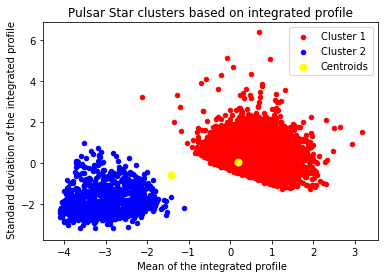

In [85]:
#Visualising the clusters by selecting only column 0 and 1
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 20, c = 'blue', label = 'Cluster 2')

#Plotting the centroids of the clusters
plt.scatter(km2.cluster_centers_[:, 0], km2.cluster_centers_[:,1], s = 50, c = 'yellow', label = 'Centroids')
print (dataset.columns)
plt.title('Pulsar Star clusters based on integrated profile')
plt.xlabel(dataset.columns[0])
plt.ylabel(dataset.columns[1])

plt.legend()
plt.show()

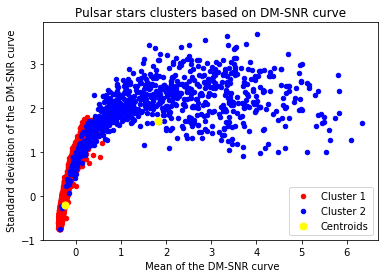

In [86]:
#Visualising the clusters by selecting only column 3 and 4
plt.scatter(x[y_kmeans == 0, 4], x[y_kmeans == 0, 5], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 4], x[y_kmeans == 1, 5], s = 20, c = 'blue', label = 'Cluster 2')

#Plotting the centroids of the clusters
plt.scatter(km2.cluster_centers_[:, 2], km2.cluster_centers_[:,3], s = 50, c = 'yellow', label = 'Centroids')
plt.title('Pulsar stars clusters based on DM-SNR curve')
plt.xlabel(dataset.columns[4])
plt.ylabel(dataset.columns[5])

plt.legend()
plt.show()

## Elbow Method - Finding Optimum Number of Cluster for k-Means Classifications

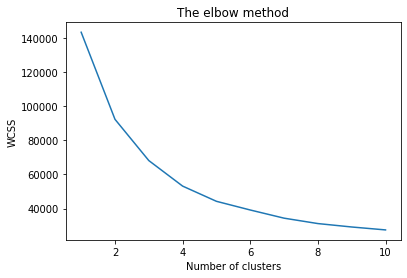

In [60]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

# Trying kmeans for k=1 to k=10
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

## k-Means with 5 clusters

Using the elbow method, we decided that the optimal number of cluster is 5. Let's look at how the data looks like with 5 clusters. 

In [74]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

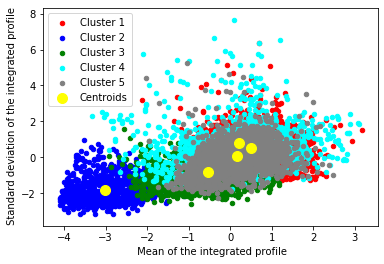

In [75]:
i = 0
j = 1
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, i], x[y_kmeans == 0, j], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, i], x[y_kmeans == 1, j], s = 20, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, i], x[y_kmeans == 2, j], s = 20, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, i], x[y_kmeans == 3, j], s = 20, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, i], x[y_kmeans == 4, j], s = 20, c = 'grey', label = 'Cluster 5')

plt.xlabel(dataset.columns[i])
plt.ylabel(dataset.columns[j])

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, i], kmeans.cluster_centers_[:,j], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

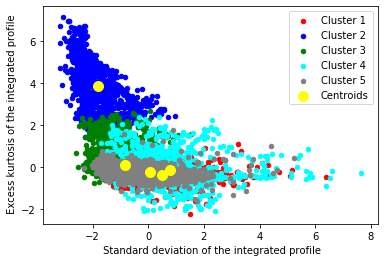

In [76]:
i = 1
j = 2
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, i], x[y_kmeans == 0, j], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, i], x[y_kmeans == 1, j], s = 20, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, i], x[y_kmeans == 2, j], s = 20, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, i], x[y_kmeans == 3, j], s = 20, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, i], x[y_kmeans == 4, j], s = 20, c = 'grey', label = 'Cluster 5')

plt.xlabel(dataset.columns[i])
plt.ylabel(dataset.columns[j])

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, i], kmeans.cluster_centers_[:,j], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

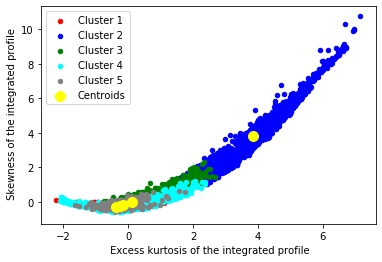

In [77]:
i = 2
j = 3
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, i], x[y_kmeans == 0, j], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, i], x[y_kmeans == 1, j], s = 20, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, i], x[y_kmeans == 2, j], s = 20, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, i], x[y_kmeans == 3, j], s = 20, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, i], x[y_kmeans == 4, j], s = 20, c = 'grey', label = 'Cluster 5')

plt.xlabel(dataset.columns[i])
plt.ylabel(dataset.columns[j])

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, i], kmeans.cluster_centers_[:,j], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

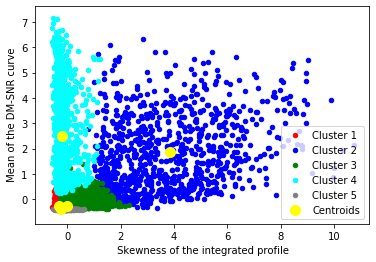

In [78]:
i = 3
j = 4
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, i], x[y_kmeans == 0, j], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, i], x[y_kmeans == 1, j], s = 20, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, i], x[y_kmeans == 2, j], s = 20, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, i], x[y_kmeans == 3, j], s = 20, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, i], x[y_kmeans == 4, j], s = 20, c = 'grey', label = 'Cluster 5')

plt.xlabel(dataset.columns[i])
plt.ylabel(dataset.columns[j])

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, i], kmeans.cluster_centers_[:,j], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

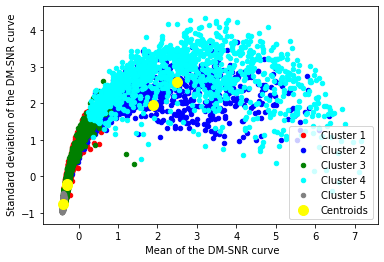

In [79]:
i = 4
j = 5
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, i], x[y_kmeans == 0, j], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, i], x[y_kmeans == 1, j], s = 20, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, i], x[y_kmeans == 2, j], s = 20, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, i], x[y_kmeans == 3, j], s = 20, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, i], x[y_kmeans == 4, j], s = 20, c = 'grey', label = 'Cluster 5')

plt.xlabel(dataset.columns[i])
plt.ylabel(dataset.columns[j])

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, i], kmeans.cluster_centers_[:,j], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

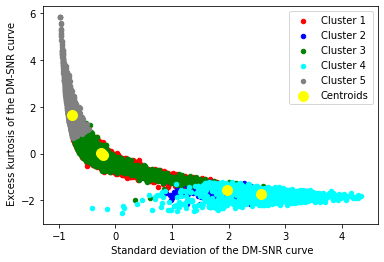

In [80]:
i = 5
j = 6
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, i], x[y_kmeans == 0, j], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, i], x[y_kmeans == 1, j], s = 20, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, i], x[y_kmeans == 2, j], s = 20, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, i], x[y_kmeans == 3, j], s = 20, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, i], x[y_kmeans == 4, j], s = 20, c = 'grey', label = 'Cluster 5')

plt.xlabel(dataset.columns[i])
plt.ylabel(dataset.columns[j])

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, i], kmeans.cluster_centers_[:,j], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

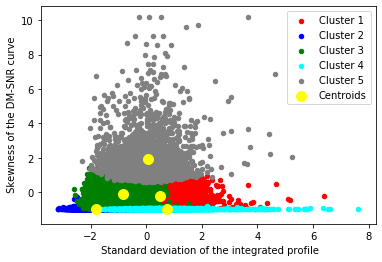

In [81]:
i = 1
j = 7
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, i], x[y_kmeans == 0, j], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, i], x[y_kmeans == 1, j], s = 20, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, i], x[y_kmeans == 2, j], s = 20, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, i], x[y_kmeans == 3, j], s = 20, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, i], x[y_kmeans == 4, j], s = 20, c = 'grey', label = 'Cluster 5')

plt.xlabel(dataset.columns[i])
plt.ylabel(dataset.columns[j])

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, i], kmeans.cluster_centers_[:,j], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [69]:
print(y_kmeans == 0, 5)
print(y_kmeans == 0, 1)
print(x[y_kmeans == 0, 1])
print(x[y_kmeans == 0, 5])
print(x[y_kmeans == 2, 5])
print(x[y_kmeans == 0, 1].shape)

[ True  True  True ... False  True False] 5
[ True  True  True ... False  True False] 1
[ 1.33483164  1.80226533 -1.05332222 ... -0.34435467  1.94328407
  1.07450972]
[-0.37062547 -0.5889241  -0.23532816 ... -0.53891904 -0.72729491
 -0.66485697]
[1.81779402 1.35829968 1.26242246 ... 0.93992561 1.67156847 1.97154554]
(15205,)


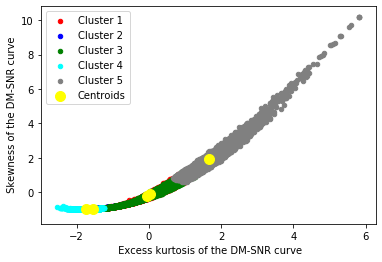

In [82]:
i = 6
j = 7
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, i], x[y_kmeans == 0, j], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, i], x[y_kmeans == 1, j], s = 20, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, i], x[y_kmeans == 2, j], s = 20, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, i], x[y_kmeans == 3, j], s = 20, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, i], x[y_kmeans == 4, j], s = 20, c = 'grey', label = 'Cluster 5')

plt.xlabel(dataset.columns[i])
plt.ylabel(dataset.columns[j])

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, i], kmeans.cluster_centers_[:,j], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

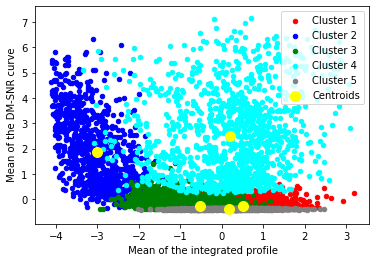

In [83]:
i = 0
j = 4
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, i], x[y_kmeans == 0, j], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, i], x[y_kmeans == 1, j], s = 20, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, i], x[y_kmeans == 2, j], s = 20, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, i], x[y_kmeans == 3, j], s = 20, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, i], x[y_kmeans == 4, j], s = 20, c = 'grey', label = 'Cluster 5')

plt.xlabel(dataset.columns[i])
plt.ylabel(dataset.columns[j])

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, i], kmeans.cluster_centers_[:,j], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()